<font size="6">**<center>Mortgage Prepayment Modeling**</font>

# Change Log

Date of change: 10/22/2023.
1. Added Change Log.
2. Added Milestone 2.
3. Updated Graph Analysis.

Date of change: 11/5/2023.
1. Added milestone 3. Please see section 6 and 7.
2. Added project conclusion. Please section 8.

# Introduction

The purpose of this project is to predict the likelihood of a home loan(Mortgage) being prepaid. To achieve this objective the Freddie Mac's Single-Family Loan-Level data set will be used. The target variable is the "PREPAID" field, which indicates whether a loan was prepaid or not.

The Freddie Mac's Single-Family Loan-Level data contains 27 columns and 500,137 rows. The "PREPAID" field is the target variable and the rest of the fields will be independent variables(or features). The data set can be downloaded directly from the following link:

https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.

# Libraries

In [1]:
# Importing the necessary libraries.
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Milestone 1  - Data Selection and EDA

## Loading Data

In [2]:
#Loading the data
mortgage_df =pd.read_csv('https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv')

#Checking if data has loaded successfully by looking at the first 10 rows.
mortgage_df.head(10)

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
0,669.0,200206,N,202901,NaN,0.0,1.0,O,80.0,33.0,...,SF,26100.0,F199Q1000004,P,320,2.0,Other sellers,Other servicers,True,False
1,732.0,199904,N,202903,17140.0,0.0,1.0,O,25.0,10.0,...,SF,45200.0,F199Q1000005,N,360,1.0,Other sellers,Other servicers,True,False
2,679.0,200208,N,202902,15940.0,30.0,1.0,O,91.0,48.0,...,SF,44700.0,F199Q1000007,P,319,1.0,Other sellers,Other servicers,True,False
3,721.0,200209,N,202902,38060.0,0.0,1.0,O,39.0,13.0,...,SF,85200.0,F199Q1000013,N,318,2.0,Other sellers,Other servicers,True,False
4,618.0,200210,N,202902,10420.0,25.0,1.0,O,85.0,24.0,...,SF,44200.0,F199Q1000015,N,317,2.0,Other sellers,Other servicers,True,False
5,738.0,200211,N,202903,10420.0,0.0,1.0,O,73.0,44.0,...,SF,44300.0,F199Q1000016,P,317,2.0,Other sellers,Other servicers,True,False
6,761.0,200211,N,202904,NaN,0.0,1.0,O,73.0,31.0,...,PU,29500.0,F199Q1000017,P,318,2.0,Other sellers,Other servicers,True,False
7,707.0,200211,N,202903,33340.0,0.0,1.0,O,60.0,57.0,...,SF,53000.0,F199Q1000018,C,317,2.0,Other sellers,Other servicers,True,False
8,760.0,200211,N,202903,33340.0,0.0,1.0,O,63.0,30.0,...,SF,53000.0,F199Q1000019,N,317,2.0,Other sellers,Other servicers,True,False
9,691.0,200302,N,202901,15940.0,0.0,1.0,O,65.0,25.0,...,SF,44700.0,F199Q1000023,P,312,2.0,Other sellers,Other servicers,True,False


The data has loaded successfully based on the first 10 rows.

## Data Validation

In [3]:
# Checking the dataframe information.
mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500137 entries, 0 to 500136
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      497426 non-null  float64
 1   FIRST_PAYMENT_DATE                500137 non-null  int64  
 2   FIRST_TIME_HOMEBUYER_FLAG         369578 non-null  object 
 3   MATURITY_DATE                     500137 non-null  int64  
 4   METROPOLITAN_STATISTICAL_AREA     429988 non-null  float64
 5   MORTGAGE_INSURANCE_PERCENTAGE     449089 non-null  float64
 6   NUMBER_OF_UNITS                   500134 non-null  float64
 7   OCCUPANCY_STATUS                  500137 non-null  object 
 8   ORIGINAL_COMBINED_LOAN_TO_VALUE   500124 non-null  float64
 9   ORIGINAL_DEBT_TO_INCOME_RATIO     485208 non-null  float64
 10  ORIGINAL_UPB                      500137 non-null  int64  
 11  ORIGINAL_LOAN_TO_VALUE            500128 non-null  f

Based on the above output, the following observations were made:
1. The FIRST_PAYMENT_DATE and MATURITY_DATE variables have the 'int64' data type. This needs to be changed to datetime data type.

2. The Non-Null count for the variables in the dataframe is different. This suggests that some observations may have missing values. Missing values will be checked and treated as appropriate.

3. Variables such as  METROPOLITAN_STATISTICAL_AREA,POSTAL_CODE, and LOAN_SEQUENCE_NUMBER may not add value in predicting the likelihood of prepayment.These variables will be dropped.

In [4]:
#Checking missing values.
len(mortgage_df)
missing_values = mortgage_df.isnull().sum()
missng_value_percentage = (missing_values/len(mortgage_df))*100
missng_value_percentage

CREDIT_SCORE                         0.542051
FIRST_PAYMENT_DATE                   0.000000
FIRST_TIME_HOMEBUYER_FLAG           26.104647
MATURITY_DATE                        0.000000
METROPOLITAN_STATISTICAL_AREA       14.025957
MORTGAGE_INSURANCE_PERCENTAGE       10.206803
NUMBER_OF_UNITS                      0.000600
OCCUPANCY_STATUS                     0.000000
ORIGINAL_COMBINED_LOAN_TO_VALUE      0.002599
ORIGINAL_DEBT_TO_INCOME_RATIO        2.984982
ORIGINAL_UPB                         0.000000
ORIGINAL_LOAN_TO_VALUE               0.001800
ORIGINAL_INTEREST_RATE               0.000000
CHANNEL                              0.000000
PREPAYMENT_PENALTY_MORTGAGE_FLAG     1.035316
PRODUCT_TYPE                         0.000000
PROPERTY_STATE                       0.000000
PROPERTY_TYPE                        0.018995
POSTAL_CODE                          0.006198
LOAN_SEQUENCE_NUMBER                 0.000000
LOAN_PURPOSE                         0.000000
ORIGINAL_LOAN_TERM                

For this project, missing values will be dropped if they only account for less than 5% of the observations for these variables:  NUMBER_OF_BORROWERS, PROPERTY_TYPE, PREPAYMENT_PENALTY_MORTGAGE_FLAG and NUMBER_OF_UNITS. Imputing missing values for these variables would not make sense.

Additionally,the following variables:CREDIT_SCORE,ORIGINAL_COMBINED_LOAN_TO_VALUE, ORIGINAL_DEBT_TO_INCOME_RATIO and ORIGINAL_LOAN_TO_VALUE, missing values will be imputed if they account for less than 5%.

Lastly, variables with missing values above 5% will be dropped. 

In [5]:
# Selecting duplicate rows except first. Occurrence based on all columns
duplicate = mortgage_df[mortgage_df.duplicated()]
duplicate 

,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,...,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT


There are no duplicate rows in the data set.

In [6]:
# Validating data ranges
mortgage_df.describe().loc[['min','max']]

,CREDIT_SCORE,FIRST_PAYMENT_DATE,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,POSTAL_CODE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS
min,300.0,199901.0,202402.0,10180.0,0.0,1.0,6.0,1.0,8000.0,6.0,4.625,600.0,301.0,1.0
max,839.0,201103.0,204101.0,49740.0,55.0,4.0,180.0,65.0,578000.0,100.0,11.500,99900.0,362.0,2.0


The range of  values in all variables appear to be good so far.

#  Milestone 2 - Data Preparation

    Step 1 : Dropping Variables with more than 5 % of missing values.

In [7]:
# Dropping FIRST_TIME_HOMEBUYER_FLAG,METROPOLITAN_STATISTICAL_AREA, MORTGAGE_INSURANCE_PERCENTAGE 
small_mortgage_df = mortgage_df.drop(['FIRST_TIME_HOMEBUYER_FLAG', 'METROPOLITAN_STATISTICAL_AREA',
                                     'MORTGAGE_INSURANCE_PERCENTAGE'], axis=1)

In [8]:
# Checking shape after dropping variables.
small_mortgage_df.shape[1]

24

The number of columns has reduced from 27 to 24. The dropping was successful. The variables were dropped because of having excessive missing values(more than 5%). Imputing them may lead to data snooping.

    Step 2: Dropping variables which are not related to the likelihood of prepayment.

In [9]:
# Dropping Postal code POSTAL_CODE, LOAN_SEQUENCE_NUMBER, SELLER_NAME, SERVICER_NAME, FIRST_PAYMENT_DATE, MATURITY_DATE
small_mortgage_df = small_mortgage_df.drop(['POSTAL_CODE','LOAN_SEQUENCE_NUMBER','SELLER_NAME','FIRST_PAYMENT_DATE','MATURITY_DATE','SERVICER_NAME'],axis=1)
small_mortgage_df.shape[1]

18

The number of columns has reduced from 24 to 22. The dropping was successful. The variables were dropped because there not be a sensible relationship between them and the likelihood of prepayment.

    Step 3 : Imputing missing values

The distribution of variables with missing values will be checked prior to imputation. If the distribution is normal , missing values will be imputed with the mean. However, if the distribution is skewed, missing values will be imputed with the median.

array([[<Axes: title={'center': 'CREDIT_SCORE'}>]], dtype=object)

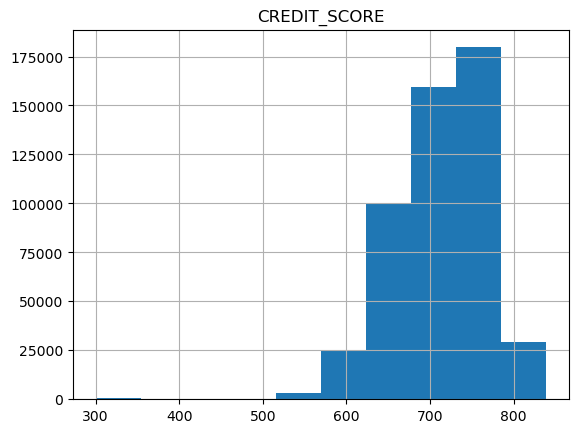

In [10]:
# Histogram of credit score
small_mortgage_df.hist('CREDIT_SCORE')

Credit_score appears to be approximately normal. Thus, the mean will be used to impute missing values.

In [11]:
# Imputing missing credit score values.
mean = round(small_mortgage_df['CREDIT_SCORE'].mean())
small_mortgage_df['CREDIT_SCORE'].fillna(value=mean, inplace=True) 

array([[<Axes: title={'center': 'ORIGINAL_DEBT_TO_INCOME_RATIO'}>]],
      dtype=object)

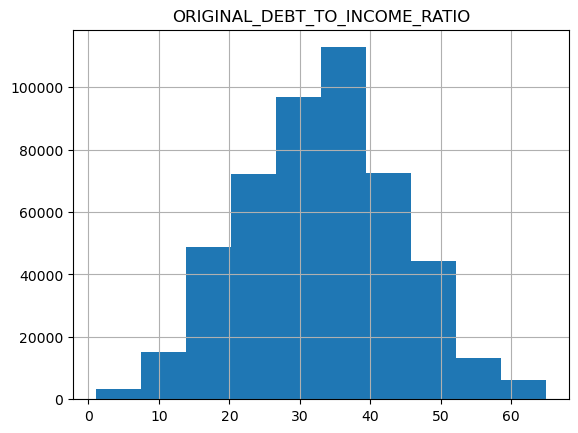

In [12]:
# Histogram of ORIGINAL_DEBT_TO_INCOME_RATIO 
small_mortgage_df.hist('ORIGINAL_DEBT_TO_INCOME_RATIO')

The original_debt_to_income_ratio appears to be approximately normal. Thus, mean will be used to impute missing values.

array([[<Axes: title={'center': 'ORIGINAL_LOAN_TO_VALUE'}>]], dtype=object)

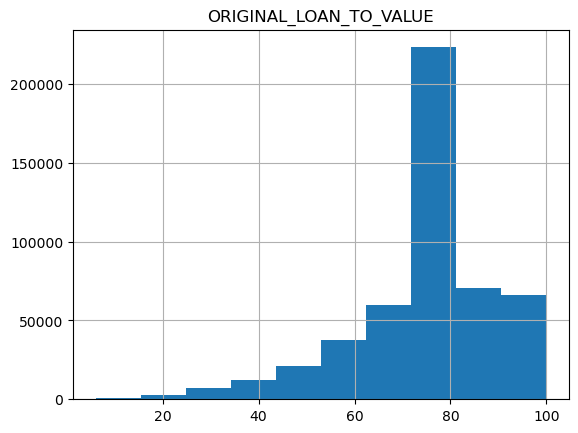

In [13]:
# Histogram of ORIGINAL_LOAN_TO_VALUE 
small_mortgage_df.hist('ORIGINAL_LOAN_TO_VALUE')

The distribution of ORIGINAL_LOAN_TO_VALUE is skewed. Thus, the median will be used to impute missing values.

In [14]:
# Imputing missing values of the ORIGINAL_LOAN_TO_VALUE
median = round(small_mortgage_df['ORIGINAL_LOAN_TO_VALUE'].median())
small_mortgage_df['ORIGINAL_LOAN_TO_VALUE'].fillna(value=median, inplace=True)

array([[<Axes: title={'center': 'ORIGINAL_COMBINED_LOAN_TO_VALUE'}>]],
      dtype=object)

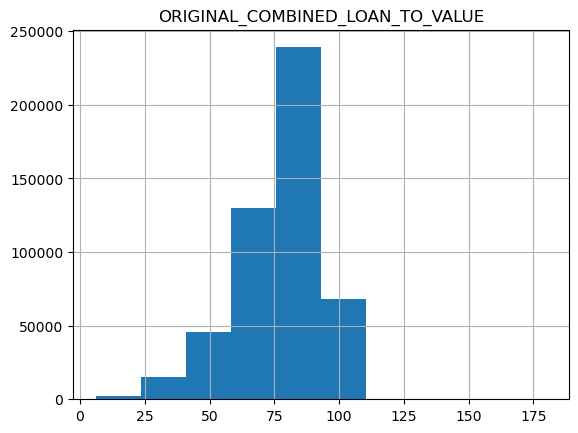

In [15]:
# Histogram of ORIGINAL_COMBINED_LOAN_TO_VALUE
small_mortgage_df.hist('ORIGINAL_COMBINED_LOAN_TO_VALUE')

The ORIGINAL_COMBINED_LOAN_TO_VALUE appeared to be skewed to the left. The median will be used to impute missing values.

In [16]:
median_combined = round(small_mortgage_df['ORIGINAL_COMBINED_LOAN_TO_VALUE'].median())
small_mortgage_df['ORIGINAL_COMBINED_LOAN_TO_VALUE'].fillna(value=median_combined, inplace=True)

array([[<Axes: title={'center': 'ORIGINAL_DEBT_TO_INCOME_RATIO'}>]],
      dtype=object)

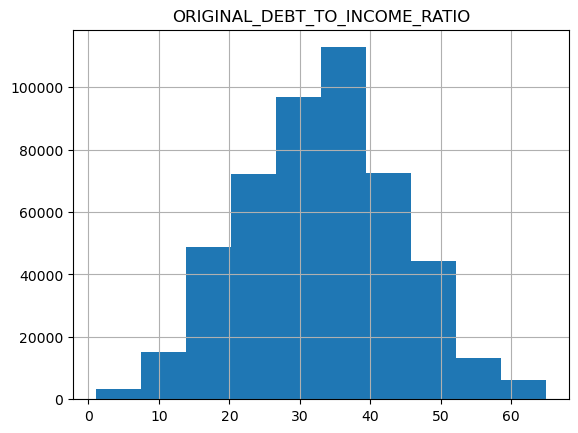

In [17]:
# Histogram of  ORIGINAL_DEBT_TO_INCOME_RATIO
small_mortgage_df.hist('ORIGINAL_DEBT_TO_INCOME_RATIO')

The ORIGINAL_DEBT_TO_INCOME_RATIO is normally distributed and the mean will be used to impute the missing values.

In [18]:
# Imputing missing credit score values.
mean = round(small_mortgage_df['ORIGINAL_DEBT_TO_INCOME_RATIO'].mean())
small_mortgage_df['ORIGINAL_DEBT_TO_INCOME_RATIO'].fillna(value=mean, inplace=True)

    Step 4 : Dropping rows for variables with less than 5% of missing values. 

Dropping makes sense in the case of the variables below because the imputing may not really reflect what the actual value might have been.

In [19]:
# NUMBER_OF_UNITS
small_mortgage_df = small_mortgage_df[small_mortgage_df['NUMBER_OF_UNITS'].notna()]

In [20]:
# PROPERTY_TYPE
small_mortgage_df = small_mortgage_df[small_mortgage_df['PROPERTY_TYPE'].notna()]

In [21]:
# PREPAYMENT_PENALTY_MORTGAGE_FLAG
small_mortgage_df = small_mortgage_df[small_mortgage_df['PREPAYMENT_PENALTY_MORTGAGE_FLAG'].notna()]

In [22]:
# NUMBER_OF_BORROWERS
small_mortgage_df = small_mortgage_df[small_mortgage_df['NUMBER_OF_BORROWERS'].notna()]

    Step 5 : Creating credit score and Original Interest rate ranges

In [23]:
# Mapping function to create credit score ranges
def map_score(score):
    if score >=720:
        return "Excellent"
    elif score >= 690:
        return "Good"
    elif score >= 630:
        return "Fair"
    elif score >= 300:
        return "Bad"
    else:
        return "Invalid"

In [24]:
# Mapping function to create Original Interest rate ranges.
# The interest rate column ranges from 4% to 11%. It will be divided into two buckets with midpoint being the cut-off.
def map_interest(interest):
    if interest >=7.5:
        return "High"
    elif interest <7.5:
        return "Low"
    else:
        return "Invalid"

In [25]:
# Applying the score mapping  function.
small_mortgage_df["Credit_Score_range"] = small_mortgage_df["CREDIT_SCORE"].apply(lambda score: map_score(score))
small_mortgage_df["Credit_Score_range"].value_counts()

Credit_Score_range
Excellent    244557
Fair         123499
Good          91146
Bad           35413
Name: count, dtype: int64

In [26]:
# Applying the interest mapping function
small_mortgage_df["INTEREST_RATE_RANGE"] = small_mortgage_df["ORIGINAL_INTEREST_RATE"].apply(lambda interest: map_interest(interest))
small_mortgage_df["INTEREST_RATE_RANGE"].value_counts()

INTEREST_RATE_RANGE
Low     382987
High    111628
Name: count, dtype: int64

In [27]:
# Checking the shape of final data.
small_mortgage_df.shape

(494615, 20)

In [28]:
# Checking dataframe information
small_mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494615 entries, 0 to 500136
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CREDIT_SCORE                      494615 non-null  float64
 1   NUMBER_OF_UNITS                   494615 non-null  float64
 2   OCCUPANCY_STATUS                  494615 non-null  object 
 3   ORIGINAL_COMBINED_LOAN_TO_VALUE   494615 non-null  float64
 4   ORIGINAL_DEBT_TO_INCOME_RATIO     494615 non-null  float64
 5   ORIGINAL_UPB                      494615 non-null  int64  
 6   ORIGINAL_LOAN_TO_VALUE            494615 non-null  float64
 7   ORIGINAL_INTEREST_RATE            494615 non-null  float64
 8   CHANNEL                           494615 non-null  object 
 9   PREPAYMENT_PENALTY_MORTGAGE_FLAG  494615 non-null  object 
 10  PRODUCT_TYPE                      494615 non-null  object 
 11  PROPERTY_STATE                    494615 non-null  object

The data types look good and the non-null count for all variables is same. So far so good with the flat file.

## Graphical analysis

    Graph 1 - Proportion of Homeowners that prepaid their mortgages.

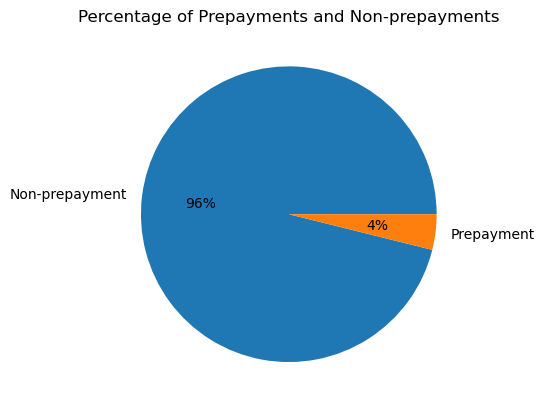

In [29]:
# Calculating the value counts for prepayments and non-prepayments.
Counts=small_mortgage_df['PREPAID'].value_counts()

# Creating the lables for the pie chart.
label=['Non-prepayment','Prepayment']

# Constructing the pie chart
plt.pie(Counts, labels=label, autopct = '%1.0f%%')

# show plot
plt.title("Percentage of Prepayments and Non-prepayments")
plt.show()

As shown in the pie chart above, 96% of clients did not prepay on their home loan whereas 4% prepaid. Therefore, the proportion of homeowners who did not prepay is greater than those that prepaid.

     Graph 2 - Relationship between Credit Score and the target variable(i.e Prepaid).

In [30]:
# Creating the Prepayment dataset from the original data:
prepayment_df = small_mortgage_df[(small_mortgage_df['PREPAID']==True)]
# Counting prepayments in each score range
Counts_Prepaid = prepayment_df.groupby('Credit_Score_range')['PREPAID'].count()

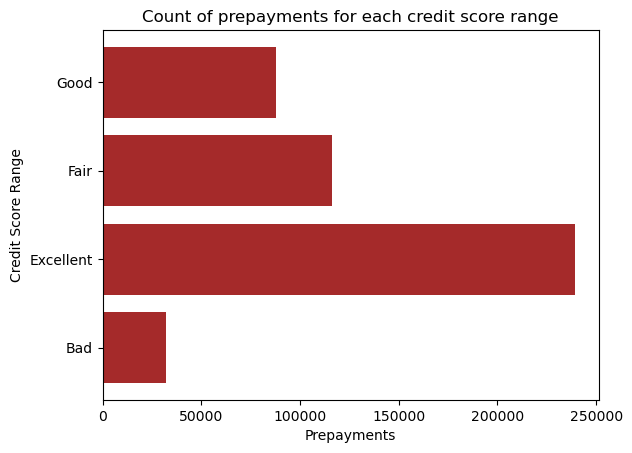

In [31]:
# Constructing a bar chart showing prepayment counts in each score range
label=['Bad','Excellent','Fair','Good'] # Creating lables for the prepaid variable
Counts_Prepaid = prepayment_df.groupby('Credit_Score_range')['PREPAID'].count() # Count of prepayments in each score range
plt.barh(label, Counts_Prepaid, color='brown') # construsting a horizontal barchart.
plt.ylabel("Credit Score Range")
plt.xlabel("Prepayments")
plt.title('Count of prepayments for each credit score range')
plt.show()

There seems to be a relationship between credit score and likelihood of Prepayment since Excellent credit score range had the highest number of prepayments whereas the bad credit score range had the lowest number of prepayments.

    Graph 3 - Relationship between Original Interest rate and Prepayment.

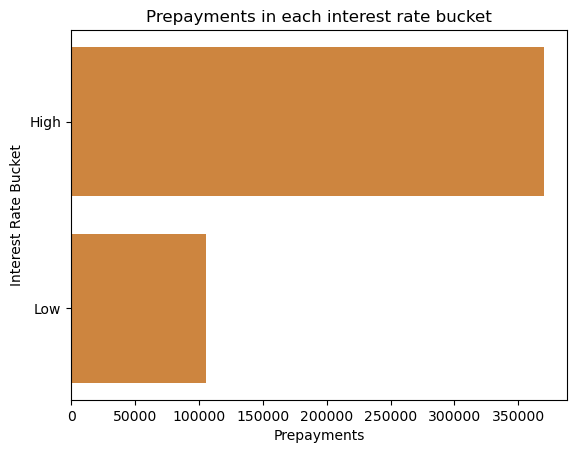

In [32]:
# Counts of prepayments in each interest rate bucket.
Counts_interest = prepayment_df.groupby('INTEREST_RATE_RANGE')['PREPAID'].count()

# Constructing a bar chart showing the prepayment counts in each interest rate bucket.
label=['Low','High'] # Creating lables for the prepaid variable
Counts_interest = prepayment_df.groupby('INTEREST_RATE_RANGE')['PREPAID'].count() # Counting prepayments
plt.barh(label, Counts_interest, color='peru') # construsting a horizontal barchart.
plt.ylabel("Interest Rate Bucket")
plt.xlabel("Prepayments")
plt.title('Prepayments in each interest rate bucket')
plt.show()

The bar chart visually inidicates that counts of prepayments changes betweem interest rate buckets. This sugggests that there may be a relationship between the original interest rate and the likelihood to prepay a home loan.

    Graph 4 - Distribution of debt to income ratio for prepaid loans and non-prepayments

In [33]:
# creating two datasets from the original data: prepayment and non-prepayment datasets
prepayment = small_mortgage_df[(small_mortgage_df['PREPAID']==True)]
non_prepayment= small_mortgage_df[(small_mortgage_df['PREPAID']==False)]

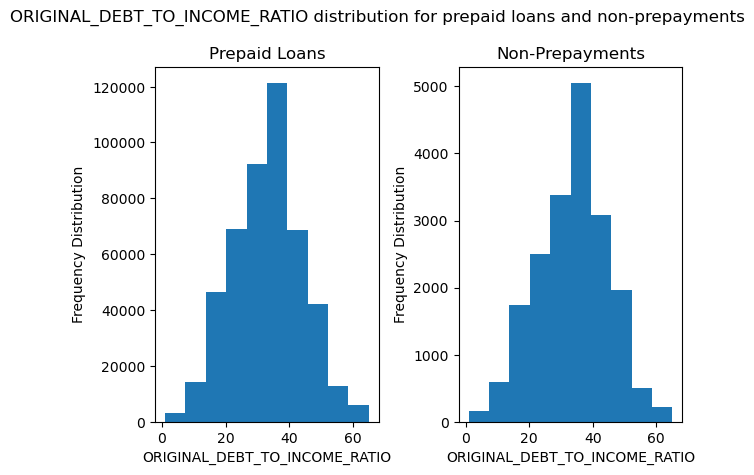

In [34]:
# Creating side by side histograms of ORIGINAL_DEBT_TO_INCOME_RATIO for prepaid loans and non-prepayments.
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('ORIGINAL_DEBT_TO_INCOME_RATIO distribution for prepaid loans and non-prepayments')
ax1.hist(prepayment['ORIGINAL_DEBT_TO_INCOME_RATIO'])
ax1.set_title('Prepaid Loans')
ax1.set(xlabel='ORIGINAL_DEBT_TO_INCOME_RATIO', ylabel='Frequency Distribution')
ax2.hist(non_prepayment['ORIGINAL_DEBT_TO_INCOME_RATIO'])
ax2.set_title('Non-Prepayments')
ax2.set(xlabel='ORIGINAL_DEBT_TO_INCOME_RATIO', ylabel='Frequency Distribution')
fig.tight_layout()

The distribution of original debt to income ratio is the same for prepayments and non-prepayments.

## Graph analysis conclusions

1. The proportion of homeowners who did not prepay is greater than those that prepaid.
2. There seems to be a relationship between credit score and likelihood of Prepayment since Excellent credit score range had the highest number of prepayments whereas the bad credit score range had the lowest number of prepayments.
3. Visual inspection of graphs sugggests that there may be a relationship between the original interest rate and the likelihood to prepay since interest rates buckets have different number of prepayments
4. Visual inspection of graphs sugggests that the distribution of debt to income for prepayments and non prepayments is the same.

## Creating Dummy Variables for categorical variables

In [35]:
# Converting Categorical Columns to dummy variables.
small_mortgage_df = pd.get_dummies(small_mortgage_df,drop_first=True)
small_mortgage_df.info()
# The get_dummies method returns dummie for all categrical columns by default.
# drop_first = True Removes the first level to get k-1 dummies out of k categorical levels. 
# This helps prevent multi-collinearity.

<class 'pandas.core.frame.DataFrame'>
Index: 494615 entries, 0 to 500136
Data columns (total 80 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CREDIT_SCORE                        494615 non-null  float64
 1   NUMBER_OF_UNITS                     494615 non-null  float64
 2   ORIGINAL_COMBINED_LOAN_TO_VALUE     494615 non-null  float64
 3   ORIGINAL_DEBT_TO_INCOME_RATIO       494615 non-null  float64
 4   ORIGINAL_UPB                        494615 non-null  int64  
 5   ORIGINAL_LOAN_TO_VALUE              494615 non-null  float64
 6   ORIGINAL_INTEREST_RATE              494615 non-null  float64
 7   ORIGINAL_LOAN_TERM                  494615 non-null  int64  
 8   NUMBER_OF_BORROWERS                 494615 non-null  float64
 9   PREPAID                             494615 non-null  bool   
 10  DELINQUENT                          494615 non-null  bool   
 11  OCCUPANCY_STATUS_O             

In [36]:
# Converting boolean values to integer values.
small_mortgage_df.replace({False: 0, True: 1}, inplace=True)

In [37]:
# Checking if conversion was successful.
small_mortgage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494615 entries, 0 to 500136
Data columns (total 80 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   CREDIT_SCORE                        494615 non-null  float64
 1   NUMBER_OF_UNITS                     494615 non-null  float64
 2   ORIGINAL_COMBINED_LOAN_TO_VALUE     494615 non-null  float64
 3   ORIGINAL_DEBT_TO_INCOME_RATIO       494615 non-null  float64
 4   ORIGINAL_UPB                        494615 non-null  int64  
 5   ORIGINAL_LOAN_TO_VALUE              494615 non-null  float64
 6   ORIGINAL_INTEREST_RATE              494615 non-null  float64
 7   ORIGINAL_LOAN_TERM                  494615 non-null  int64  
 8   NUMBER_OF_BORROWERS                 494615 non-null  float64
 9   PREPAID                             494615 non-null  int64  
 10  DELINQUENT                          494615 non-null  int64  
 11  OCCUPANCY_STATUS_O             

All booleans have been converted to integer. Now the data is ready for modeling.

# Milestone 3 - Model Building and Evaluation
 

## Data Partition

In [38]:
# Seperating data into independent(ivr) and dependent(target) variables.
ivr_df = small_mortgage_df.drop(columns = 'PREPAID')
target_df =small_mortgage_df['PREPAID']

#Splitting data into 80% training and 20% test data.
train_ivr,test_ivr,train_target, test_target = train_test_split(ivr_df,target_df,random_state=104,test_size=0.2,shuffle=True)

## Feature Selection

- Selecting 10 best features using χ2-statistic selector

In [39]:
# Select 10 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=10)
features_kbest = chi2_selector.fit_transform(train_ivr,train_target)

In [40]:
# Displaying the best selected features.
mask = chi2_selector.get_support()
features_list = train_ivr.columns[mask]
print("List of selected features:")
for (i,name) in enumerate(features_list,start=1):
    print(i,name)

List of selected features:
1 CREDIT_SCORE
2 ORIGINAL_COMBINED_LOAN_TO_VALUE
3 ORIGINAL_UPB
4 ORIGINAL_LOAN_TO_VALUE
5 DELINQUENT
6 PROPERTY_STATE_CA
7 PROPERTY_STATE_OH
8 PROPERTY_TYPE_MH
9 Credit_Score_range_Excellent
10 Credit_Score_range_Fair


In [41]:
# Pulling best features from the training data set.
best_features_train=train_ivr[features_list]

# Pulling best features from the test data set.
best_features_test=test_ivr[features_list]

In [42]:
# Create min-max scaler.
scaler = MinMaxScaler()

# Scaling the training features
train_ivr_scaled = scaler.fit_transform(best_features_train)

#Transforming test features
test_ivr_transformed = scaler.transform(best_features_test)

## Potential Modeling Algorithms

Since the target variable is binary, the following algorithms will be built and tested:
1. Logistic Regression
2. Random Forests
3. Support Vector Machine(SVM)

Further, the following metrics will be used to assess model performance on both the training set and test set:

- Accuracy is the number of correct predictions divided by the total number of predictions made, multiplied by 100 to turn it into a percentage.

- F1 score incorporates both Recall and Precision. The model with the highest F1 score represents the model that is best able to classify observations into classes. F1 score reaches its best value at 1 and worst score at 0. 

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Further,accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes. In this project, correctly predicting prepayment(True positives) is more important and hence, accuracy will be used to select the best model.

Metrics reference:

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.


**Functions to ouput performance metrics**

In [43]:
def performance_metrics(actual,predictions):
    ''' This function computes the F1 and MCC.'''
    # Calculating F1 score
    f1=round(f1_score(actual, predictions),4)
    # Calculating accuracy score.
    score = round(accuracy_score(actual,predictions),4)*100
    
    # Printing the metrics

    print("f1-score:",f1)
    print("Accuracy:",score)
    print(" ")
 

In [44]:
def conf_matrix(actual,predictions):
    " This function calculates the accuracy score and displays it on the confusion matrix"
    # Calculating accuracy score
    score = round(accuracy_score(actual,predictions),4)*100
    
    # Creating confusion matrix.
    confusion_matrix = metrics.confusion_matrix(actual, predictions)
    
    # Displaying confusion matrix.
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'twilight');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score as a % : {0}'.format(score)
    plt.title(all_sample_title, size = 10);


### Logistic Regression

- Fitting the model using features selected using χ2-statistic selector

In [45]:
# Creating the logistic regression object.
lr = LogisticRegression()
logistic_model = lr.fit(train_ivr_scaled,train_target)

#### Model performance on training set

In [46]:
# Generating model predicitions
predictions_lr_train = logistic_model.predict(train_ivr_scaled)
# Performance metrics 
performance_metrics(train_target,predictions_lr_train)

f1-score: 0.9837
Accuracy: 96.84
 


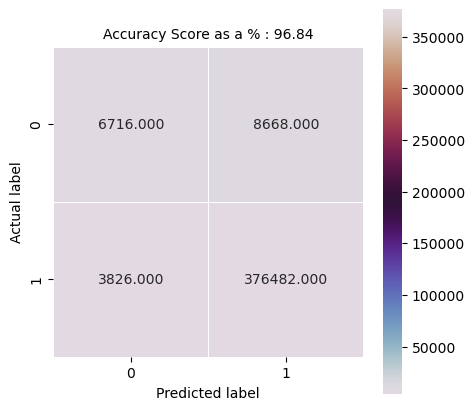

In [47]:
# Displaying accuracy and confusion matrix
conf_matrix(train_target,predictions_lr_train)

#### Model performance on test set

In [48]:
# Generating model predicitions
predictions_lr_test = logistic_model.predict(test_ivr_transformed)
# Performance metrics 
performance_metrics(test_target,predictions_lr_test)

f1-score: 0.984
Accuracy: 96.89999999999999
 


In [1]:
# Displaying accuracy score and confusion matrix
conf_matrix(test_target,predictions_lr_test)

NameError: name 'conf_matrix' is not defined

The F1 score for training set and test set is the same(0.984). The accuracy has slightly increased on the test set to 96.9% from 96.84% on the training set.

## Random Forest

- Fitting the model using features selected using χ2-statistic selector

In [50]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
random_forest = randomforest.fit(train_ivr_scaled,train_target)

#### Model performance on training set

In [51]:
# Generating model predicitions
predictions_rf_train = random_forest.predict(train_ivr_scaled)
# Performance metrics 
performance_metrics(train_target,predictions_rf_train)

f1-score: 0.9972
Accuracy: 99.46000000000001
 


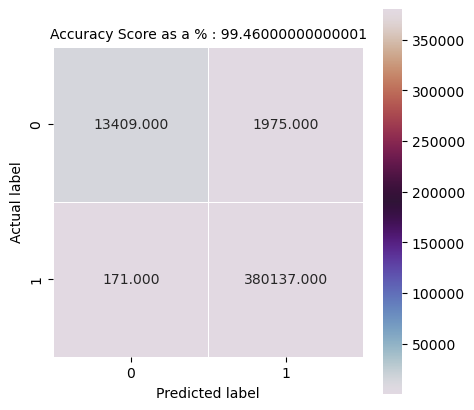

In [52]:
# Displaying accuracy score and confusion matrix
conf_matrix(train_target,predictions_rf_train)

#### Model performance on test set

In [53]:
# Generating model predicitions
predictions_rf_test = random_forest.predict(test_ivr_transformed)
# Performance metrics 
performance_metrics(test_target,predictions_rf_test)

f1-score: 0.9821
Accuracy: 96.54
 


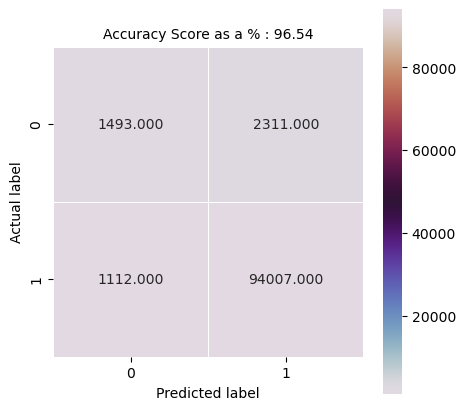

In [54]:
# Displaying accuracy and confusion matrix
conf_matrix(test_target,predictions_rf_test)

The performance metrics on the test set are lower than performance metrics on the training set. This means that the model performs better on the data it has seen than on the data it has not seen. Notably,the accuracy of the random forest on the test set(96.54%) is lower than the accuracy of the logistic regression on the test set(96.9%).

## Support Vector Machine

- Fitting the model using features selected using χ2-statistic selector

In [55]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

In [56]:
# Train model
svc_model = svc.fit(train_ivr_scaled,train_target)

#### Model performance on training set

In [57]:
# Generating model predicitions
predictions_svc_train = svc_model.predict(train_ivr_scaled)

In [58]:
# Performance metrics 
performance_metrics(train_target,predictions_svc_train)

f1-score: 0.9833
Accuracy: 96.78
 


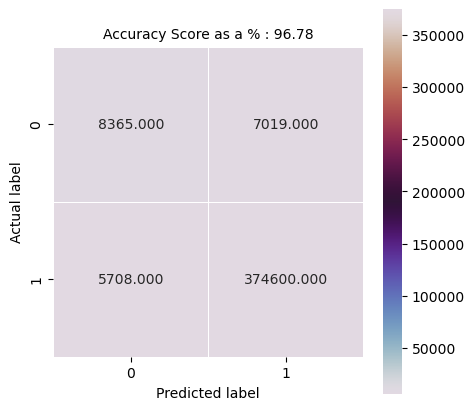

In [59]:
# Displaying accuracy score and confusion matrix
conf_matrix(train_target,predictions_svc_train)

#### Model performance on test set

In [60]:
# Generating model predicitions
predictions_svc_test = svc_model.predict(test_ivr_transformed)
# Performance metrics 
performance_metrics(test_target,predictions_svc_test)

f1-score: 0.9837
Accuracy: 96.87
 


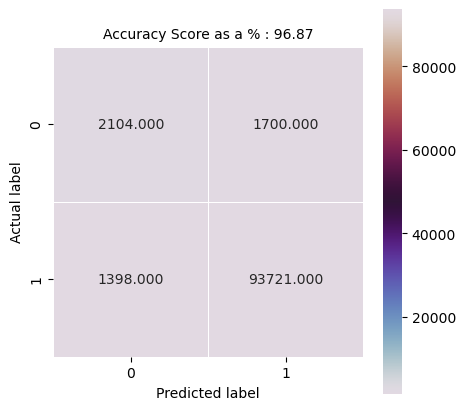

In [61]:
# Displaying accuracy score and confusion matrix
conf_matrix(test_target,predictions_svc_test)

Performance metrics on the test set are higher than performance metrics on the training set. Notably,the accuracy of the SVC on the test set(96.87%) is higher than the random forest but lower than the accuracy of the logistic regression on the test set(96.9%).

Overall, logistic regression does a better job than the other two models in classifying and predicting whether homeowners prepaid or not.

In the next section, model pipelines for the three algorithms will be built using PCA instead of χ2-statistic to select features. This will be done to check if a different method of feature selection would also lead to the conclusion that logistic regression does a better job than the other two models in predicting whether homeowners prepaid or not.

# Milestone 3 - Creating a model pipeline

## Logistic Regression Pipeline

In [62]:
# Creating the logistic regression model object
lr = LogisticRegression(solver = 'liblinear')
# Create a PCA that will retain 90% of variance.
pca = PCA(n_components=0.90, whiten=True)
# Creating a pipeline with logistic regression
pipe =Pipeline([('scaler',scaler),('pca',pca),('classifier',lr)])

In [63]:
# Train the logistic regression classifier
pipe.fit(train_ivr, train_target)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9, whiten=True)),
                ('classifier', LogisticRegression(solver='liblinear'))])

- Logistic Regression model performance on training set

In [64]:
# Predicting the training set using logistic regression.
training_predictions_lr = pipe.predict(train_ivr)

In [65]:
# Performance metrics 
performance_metrics(train_target,training_predictions_lr)

f1-score: 0.9838
Accuracy: 96.86
 


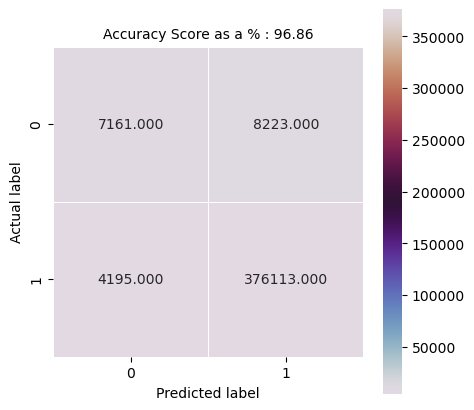

In [66]:
# Displaying accuracy and confusion matrix
conf_matrix(train_target,training_predictions_lr)

- Logistic Regression model performance on test set

In [67]:
# Predicting the test set using default parameters of logistic regression.
test_predictions_lr = pipe.predict(test_ivr)

In [68]:
# Performance metrics 
performance_metrics(test_target,test_predictions_lr)

f1-score: 0.9841
Accuracy: 96.93
 


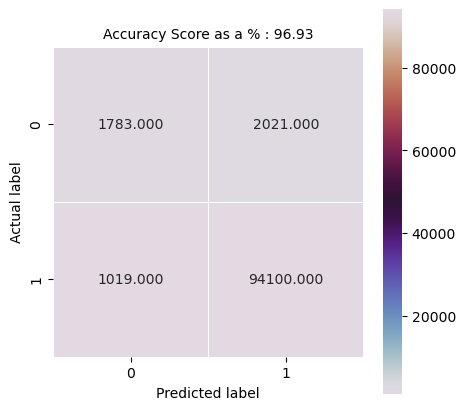

In [69]:
# Displaying accuracy and confusion matrix
conf_matrix(test_target,test_predictions_lr)

The F1 score for training set and test set is the same(0.984). The accuracy has slightly increased on the test set to 96.93% from 96.86% on the training set.

## Random Forest Pipeline

In [70]:
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create a PCA that will retain 90% of variance.
pca = PCA(n_components=0.90, whiten=True)
# Creating a pipeline with logistic regression as a starting algorithm
pipe_rf =Pipeline([('scaler',scaler),('pca',pca),('classifier',randomforest)])

In [71]:
# Train the Random Forest classifier
pipe_rf.fit(train_ivr, train_target)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9, whiten=True)),
                ('classifier',
                 RandomForestClassifier(n_jobs=-1, random_state=0))])

- Random forest model performance on training set

In [72]:
# Predicting the training set using default parameters of Random forest.
training_predictions_rf = pipe_rf.predict(train_ivr)

In [73]:
# Performance metrics 
performance_metrics(train_target,training_predictions_rf)

f1-score: 1.0
Accuracy: 100.0
 


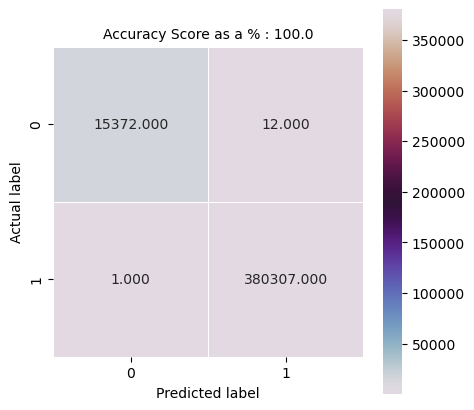

In [74]:
# Displaying accuracy and confusion matrix
conf_matrix(train_target,training_predictions_rf)

- Random forest model performance on the test set

In [75]:
# Predicting the test set using default parameters of Random forest.
test_predictions_rf = pipe_rf.predict(test_ivr)

In [76]:
# Performance metrics 
performance_metrics(test_target,test_predictions_rf)

f1-score: 0.9842
Accuracy: 96.94
 


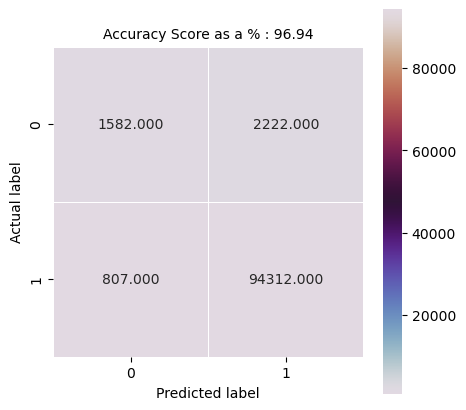

In [77]:
# Displaying accuracy and confusion matrix
conf_matrix(test_target,test_predictions_rf)

Although the F1 score(0.984) on test set is the same as that of logistic regression and the accuracy on the test set is higher than that of logistic regression, both metrics on decreased on the test set compared to the training set. This indicates that the random forest performs better on the data it has seen than the data it has not seen in training.

## Support Vector Machine Pipeline

In [78]:
# Create support vector classifier
svc = LinearSVC(C=1.0,random_state=42, max_iter=100000)
# Create a PCA that will retain 90% of variance.
pca = PCA(n_components=0.90, whiten=True)
# Creating a pipeline with logistic regression as a starting algorithm
pipe_svc =Pipeline([('scaler',scaler),('pca',pca),('classifier',svc)])

In [79]:
# Training the SVC
pipe_svc.fit(train_ivr, train_target)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=0.9, whiten=True)),
                ('classifier', LinearSVC(max_iter=100000, random_state=42))])

- SVC model performance on training set

In [80]:
# Predicting the training set using default parameters of the SVC.
training_predictions_svc = pipe_svc.predict(train_ivr)

In [81]:
# Performance metrics 
performance_metrics(train_target,training_predictions_svc)

f1-score: 0.9833
Accuracy: 96.78999999999999
 


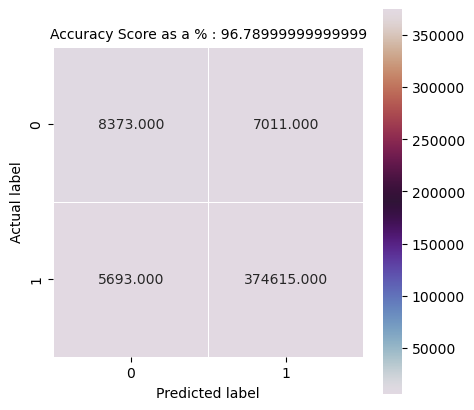

In [82]:
# Displaying accuracy and confusion matrix
conf_matrix(train_target,training_predictions_svc)

- SVC model performance on the testing set

In [83]:
# Predicting the test set using default parameters of the SVC.
test_predictions_svc = pipe_svc.predict(test_ivr)

In [84]:
# Performance metrics 
performance_metrics(test_target,test_predictions_svc);

f1-score: 0.9838
Accuracy: 96.87
 


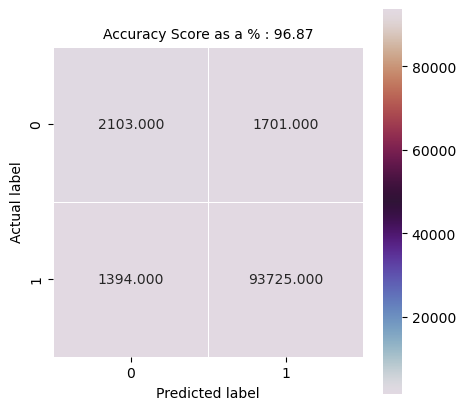

In [85]:
# Displaying accuracy and confusion matrix
conf_matrix(test_target,test_predictions_svc)

The F1 score and the accuracy on the test set are slightly higher than on the training set.Thus, unlike the random forest, the support vector machine is performing better on the test set than on the training set as evidenced by the increase in performance metrics. Nevertheless, it's accuracy on the test set(96.87%) is lower than the accuracy of the logistic regression model on the test set(96.93%)

# Conclusion

Logistic Regression does a better job than the Random Forest and Support Vector Machine in classifying and predicting prepaid loans, whether we use the χ2-statistic or PCA to select features. It has a high accuracy score and did not overfit the training data.